# Dune Toe and Dune Ridge Feature Extraction

*Disclaimer: This notebook is in draft form and may require adjustments to run smoothly. If you encounter any issues, please inform us so we can assist you.* 

Shoreline dune migration refers to the natural movement of sand dunes along coastal areas. This process is driven by various factors, primarily wind but also waves and tidal currents. The sand is transported from one place to another, causing the dunes to gradually shift in position and shape over time.

This migration is an important natural phenomenon because it affects coastal ecosystems, wildlife habitats, and even human infrastructure. The movement of dunes can provide natural coastal protection against storms and sea-level rise, but it can also pose challenges for coastal management, especially in areas where development is close to the shore.

Monitoring and managing dune migration are crucial for maintaining the balance between protecting natural landscapes and supporting human activities along coastlines. The following figures shows the shorelines dune migration (images from [Hardin et al. (2014)](https://link.springer.com/chapter/10.1007/978-1-4939-1835-5_4).

Based on [Hardin et al. (2014)](https://link.springer.com/chapter/10.1007/978-1-4939-1835-5_4)

![](../img/dunes_migration.png)

![](../img/dunes_migration_1.png)

***

## 1. Import Python Packages

In [1]:
import subprocess
import sys
from pathlib import Path

sys.path.append(
    subprocess.check_output(["grass", "--config", "python_path"], text=True, shell=False).strip()
)

import grass.script as gs
import grass.jupyter as gj

***

## 2. Start GRASS Session

In [2]:
gj.init("nags_head/PERMANENT")


In [3]:
!g.region raster="JR_2014" -p

projection: 99 (NAD83(HARN) / North Carolina)
zone:       0
datum:      nad83harn
ellipsoid:  grs80
north:      250984
south:      249364
west:       912140
east:       914462
nsres:      2
ewres:      2
rows:       810
cols:       1161
cells:      940410


***

## 3. Foredune Ridge Line
* Purpose: Extract a dune ridge as a least cost path.

* Specify two points that were manually selected at

* opposite ends of dune ridge.

* Compute cost surface.

In [4]:
# Compute cost surface.
!r.mapcalc expression='cost=exp(-2*JR_2014)' --o  

# Compute a cumulative cost surface.
!r.cost -k input=cost output=cumulative_cost start_coordinates='913859,250658' stop_coordinates='914305,249739' --o

# Calculate the least coast path.
!r.drain input=cumulative_cost output=JR_2014_duneRidge start_coordinates='914305,249739' --o
# Extract dune ridge.

!r.mapcalc \
expression='JR_2014_duneRidge=float\
(JR_2014_duneRidge)*JR_2014' --o


   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Reading raster map <cost@PERMANENT>, initializing output...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Finding cost path...
   0   2 100
Writing output raster map <cumulative_cost>...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
r.cost complete. Peak cost value: 0.148332
Reading input elevation raster map...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Filling sinks...
Determining flow directions for ambiguous cases...
Found 1 unresolved area
Writing output raster maps...
   0   6  12  18  24  30  36  42  48  54  60  66  72  78  84  90  96 100
Writing output rast

In [5]:
!r.to.vect -s input=JR_2014_duneRidge output=JR_2014_duneRidge_vector type=line

         overwritten
Extracting lines...
   2   5   8  11  14  17  20  23  26  29  32  35  38  41  44  47  50  53  56  59  62  65  68  71  74  77  80  83  86  89  92  95  98 100
 100
Building topology for vector map <JR_2014_duneRidge_vector@PERMANENT>...
Registering primitives...
r.to.vect complete.


***

## 4. Visualization

Color table for raster map <JR_2014> set to 'elevation'
Color table for raster map <JR_2014_duneRidge> set to 'blues'



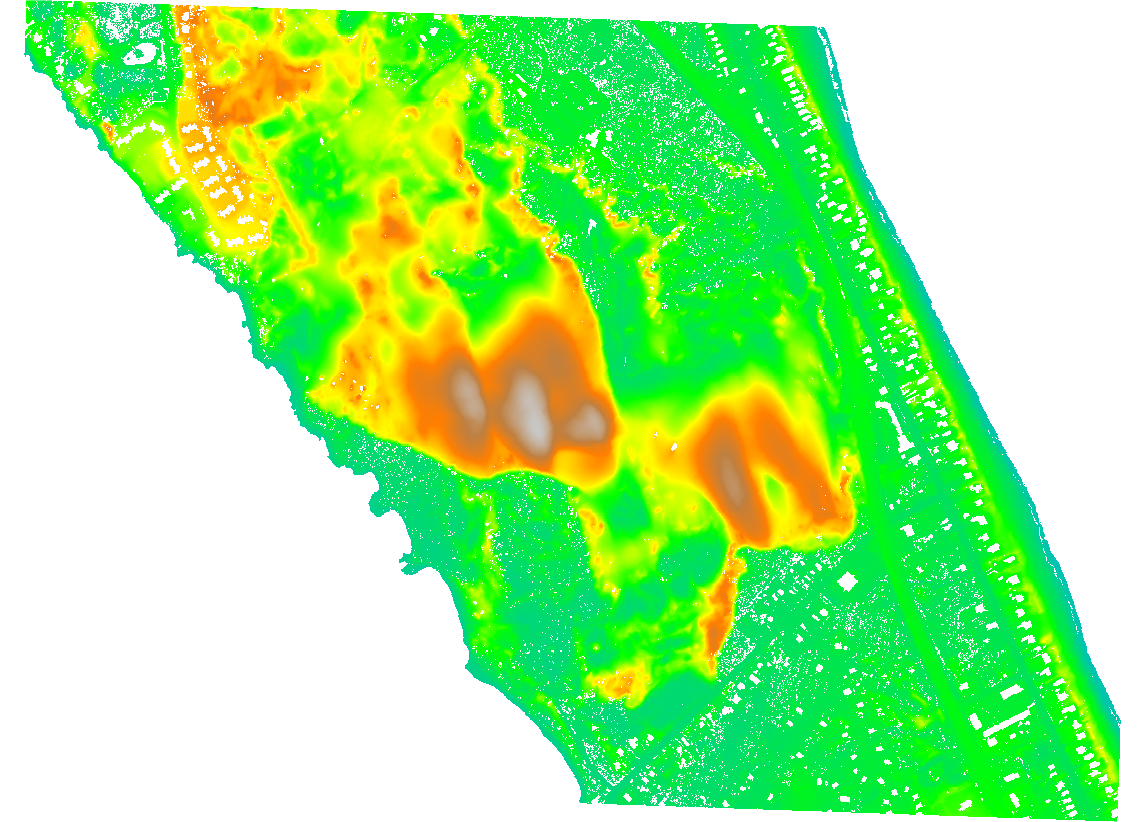

In [6]:
!r.colors map=JR_2014 color=elevation
!r.colors map=JR_2014_duneRidge color=blue

fig = gj.InteractiveMap(width=800, tiles="OpenStreetMap")
fig.add_raster("JR_2014")
fig.add_vector("JR_2014_duneRidge_vector")
fig.add_layer_control()
fig.show()

***

## 4. Foredune Toe Line
* Purpose: Compute dune toe line with elastic sheet

In [7]:
!g.list type=vect

JR_2014
JR_2014_08m
JR_2014_duneRidge_vector
JR_2014_shore
JR_2014_spline2020_08m
JR_2014_spline_08m
JR_2020_08m
JR_2020_shore
JR_2020_shoreline
JR_spline2020_08m
NH_2008_08m_sm
sheet_BC


In [8]:
!g.list type=rast

JR_2014
JR_2014_08m
JR_2014_duneRidge
JR_2014_duneToe
JR_2014_duneToe_new
JR_2014_mask
JR_2014_raw
JR_2014_shore_rast
JR_2014_spline
JR_2016_mask
JR_2016_raw
JR_2018
JR_2018_mask
JR_2018_raw
JR_2020_mask
JR_2020_raw
NH_2008_08m_sm_rast
cost
cumulative_cost
deviation_map
naip_2014.1
naip_2014.2
naip_2014.3
naip_2020.1
naip_2020.2
naip_2020.3
sheet
sheet_BC
sheet_BC_buff


In [9]:
#!v.build map=JR_2014 option=build

In [10]:
# conditions for efficiency.
gs.run_command( 'v.patch', input='JR_2014_duneRidge_vector,JR_2014_08m', output='sheet_BC')

In [11]:
gs.run_command( 'g.region', vect='sheet_BC' )

In [12]:
gs.run_command( 'v.to.rast', input='JR_2014_08m', output='JR_2014_08m', use='val', value='0.8' )

In [13]:
gs.run_command( 'r.patch', input='JR_2014_duneRidge,JR_2014_08m', output='sheet_BC', overwrite=True)

In [14]:
gs.run_command( 'g.copy', rast='JR_2014,sheet' )

In [15]:
iterations = 3000
for i in range(iterations):
    #print (i)
    gs.run_command( 'r.neighbors', flags='c', input='sheet', output='sheet', method='average', size=3, overwrite=True )
    gs.run_command( 'r.patch', input='sheet_BC,sheet', output='sheet', overwrite=True )
gs.run_command( 'r.colors', map='sheet', rast='JR_2014' )

In [16]:

# Make small null buffer around dune ridge and

# shoreline to keep extracted toe between them.

gs.run_command( 'r.buffer', input='sheet_BC', output='sheet_BC_buff', dist=1 )
gs.run_command( 'r.mapcalc', expression='deviation_map=if(isnull(sheet_BC_buff), sheet-JR_2014, null())' )

# Again, use two manually selected points.

pt1 = '913878,250654'
pt2 = '914317,249759'

# Extract dune toe.
gs.run_command( 'r.mapcalc', expression='cost=exp(-5*deviation_map)' )
gs.run_command( 'r.mapcalc', expression='cost=exp(-5*deviation_map)' )
gs.run_command( 'r.drain', input='cumulative_cost', output='JR_2014_duneToe_new', start_coordinates=pt2 )
gs.run_command( 'r.mapcalc', expression='JR_2014_duneToe_new=float(JR_2014_duneToe_new)*JR_2014' )

In [17]:
!g.list type=raster

JR_2014
JR_2014_08m
JR_2014_duneRidge
JR_2014_duneToe
JR_2014_duneToe_new
JR_2014_mask
JR_2014_raw
JR_2014_shore_rast
JR_2014_spline
JR_2016_mask
JR_2016_raw
JR_2018
JR_2018_mask
JR_2018_raw
JR_2020_mask
JR_2020_raw
NH_2008_08m_sm_rast
cost
cumulative_cost
deviation_map
naip_2014.1
naip_2014.2
naip_2014.3
naip_2020.1
naip_2020.2
naip_2020.3
sheet
sheet_BC
sheet_BC_buff


***

## 5. Visualization

In [18]:
#dune = gj.Map(use_region=True)
#dune.d_rast(map="JR_2014_duneToe_new") # d.rast map=naip_2020.1
#dune.show()


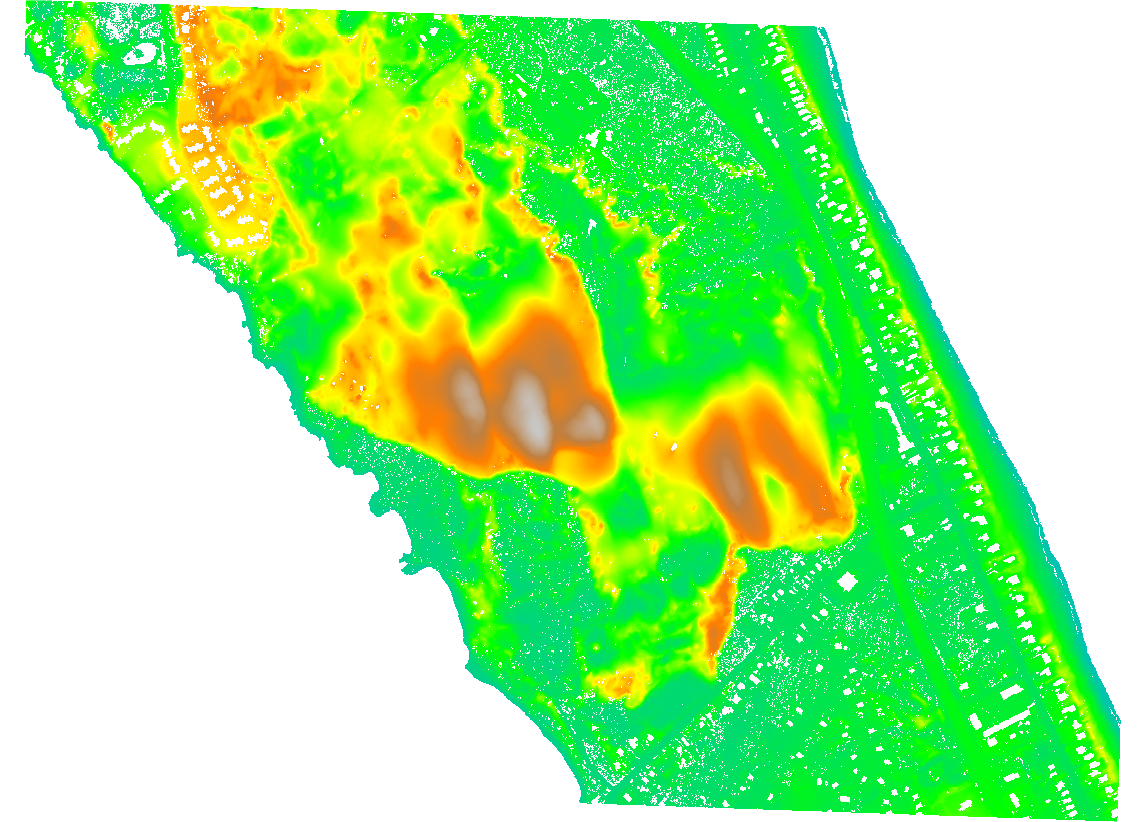
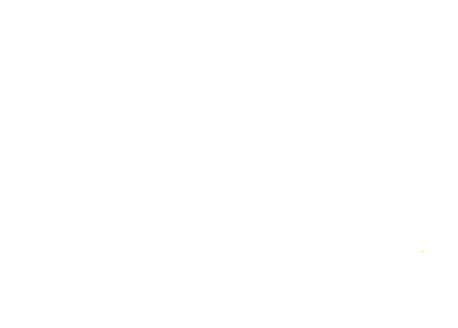

In [19]:
#dunes = gj.Map(use_region="JR_2014_duneRidge_vector")
dunes = gj.InteractiveMap(width=800, tiles="OpenStreetMap")
dunes.add_raster("JR_2014")
dunes.add_raster("JR_2014_duneToe_new")
dunes.add_vector("JR_2014_duneRidge_vector")
dunes.add_vector("JR_2014_shore")
dunes.add_layer_control()
dunes.show()